# ML Final Project

This project aims to classify patients with different types of thyroid related disease given their age, sex, and medical information – including test results for thyroid hormone levels in blood. The data was obtained from [this UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/thyroid+disease). The repository contains several text files with different subsets of the data. One of them contains information for over 9000 unique patients along with a medical diagnosis out of 20 possible classes. Those classes make up 7 distinct diagnosis types:
- `hyperthyroid conditions`
- `hypothyroid conditions`
- `binding protein conditions`
- `non-thyroidal conditions`
- `replacement therapy`
- `discordant results`
- `negative diagnosis`

The different target diagnoses were mapped to one of these classes at the moment import to the notebook. Some inconclusive diagnoses were dropped given that they make up less than 3% of all cases present in the dataset.

#### Preliminary Thyroid Disease Research

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# importing dataset from persistent landing
thyroidDF = pd.read_csv('landing/persistent/thyroidDF.csv') # thyroidDF.csv

# dropping redundant attributes from thyroidDF dataset
thyroidDF.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id'], axis=1, inplace=True)

# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
                'A': 'hyper', 
                'B': 'hyper', 
                'C': 'hyper', 
                'D': 'hyper',
                'E': 'hypo', 
                'F': 'hypo', 
                'G': 'hypo', 
                'H': 'hypo',
                'I': 'binding', 
                'J': 'binding',
                'K': 'other',
                'L': 'rep',
                'M': 'rep',
                'N': 'rep',  
                'R': 'discordant'}

thyroidDF['target'] = thyroidDF['target'].map(diagnoses) # re-mapping
thyroidDF.dropna(subset=['target'], inplace=True)

# dataset summary
thyroidDF.info()
thyroidDF.describe()
thyroidDF.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8890 entries, 0 to 9171
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8890 non-null   int64  
 1   sex                  8590 non-null   object 
 2   on_thyroxine         8890 non-null   object 
 3   query_on_thyroxine   8890 non-null   object 
 4   on_antithyroid_meds  8890 non-null   object 
 5   sick                 8890 non-null   object 
 6   pregnant             8890 non-null   object 
 7   thyroid_surgery      8890 non-null   object 
 8   I131_treatment       8890 non-null   object 
 9   query_hypothyroid    8890 non-null   object 
 10  query_hyperthyroid   8890 non-null   object 
 11  lithium              8890 non-null   object 
 12  goitre               8890 non-null   object 
 13  tumor                8890 non-null   object 
 14  hypopituitary        8890 non-null   object 
 15  psych                8890 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,0.3,NaN,NaN,NaN,NaN,NaN,other,negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,1.6,1.9,128.0,NaN,NaN,NaN,other,negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,11.0,other,negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,26.0,other,negative
5,60,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,26.0,other,negative
6,77,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,21.0,other,negative
7,28,F,f,f,f,f,f,f,f,f,...,f,f,0.7,2.6,116.0,NaN,NaN,NaN,SVI,negative
8,28,F,f,f,f,f,f,f,f,f,...,f,f,1.2,1.8,76.0,NaN,NaN,NaN,other,negative
9,28,F,f,f,f,f,f,f,f,f,...,f,f,1.9,1.7,83.0,NaN,NaN,NaN,other,negative
10,54,F,f,f,f,f,f,f,f,f,...,f,f,1.9,2.3,133.0,NaN,NaN,NaN,other,negative


### Data Summary & Initial Thoughts

The columns listed below were removed because of redundacy. They are boolean and state whether or not a value has been recorded for their respective blood tests. If a value has been recorded for a blood test, it will be present in its column. Otherwise, it will be null.
- `TSH_measured`
- `T3_measured`
- `TT4_measured`
- `T4U_measured`
- `FTI_measured`
- `TBG_measured`

The `patient_id` attribute was also removed after checking for duplicate observations because it provides no use to us moving forward.

In [168]:
thyroidDF[thyroidDF.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,1.10,2.0,118.0,1.13,104.0,NaN,SVI,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,0.38,2.0,113.0,1.08,104.0,NaN,other,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,0.03,2.8,112.0,0.84,133.0,NaN,other,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,1.50,NaN,132.0,1.02,129.0,NaN,other,negative


In [169]:
# changing age of observations with ('age' > 100) to null
thyroidDF['age'] = np.where((thyroidDF.age > 100), np.nan, thyroidDF.age)

---
## Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='TBG'>

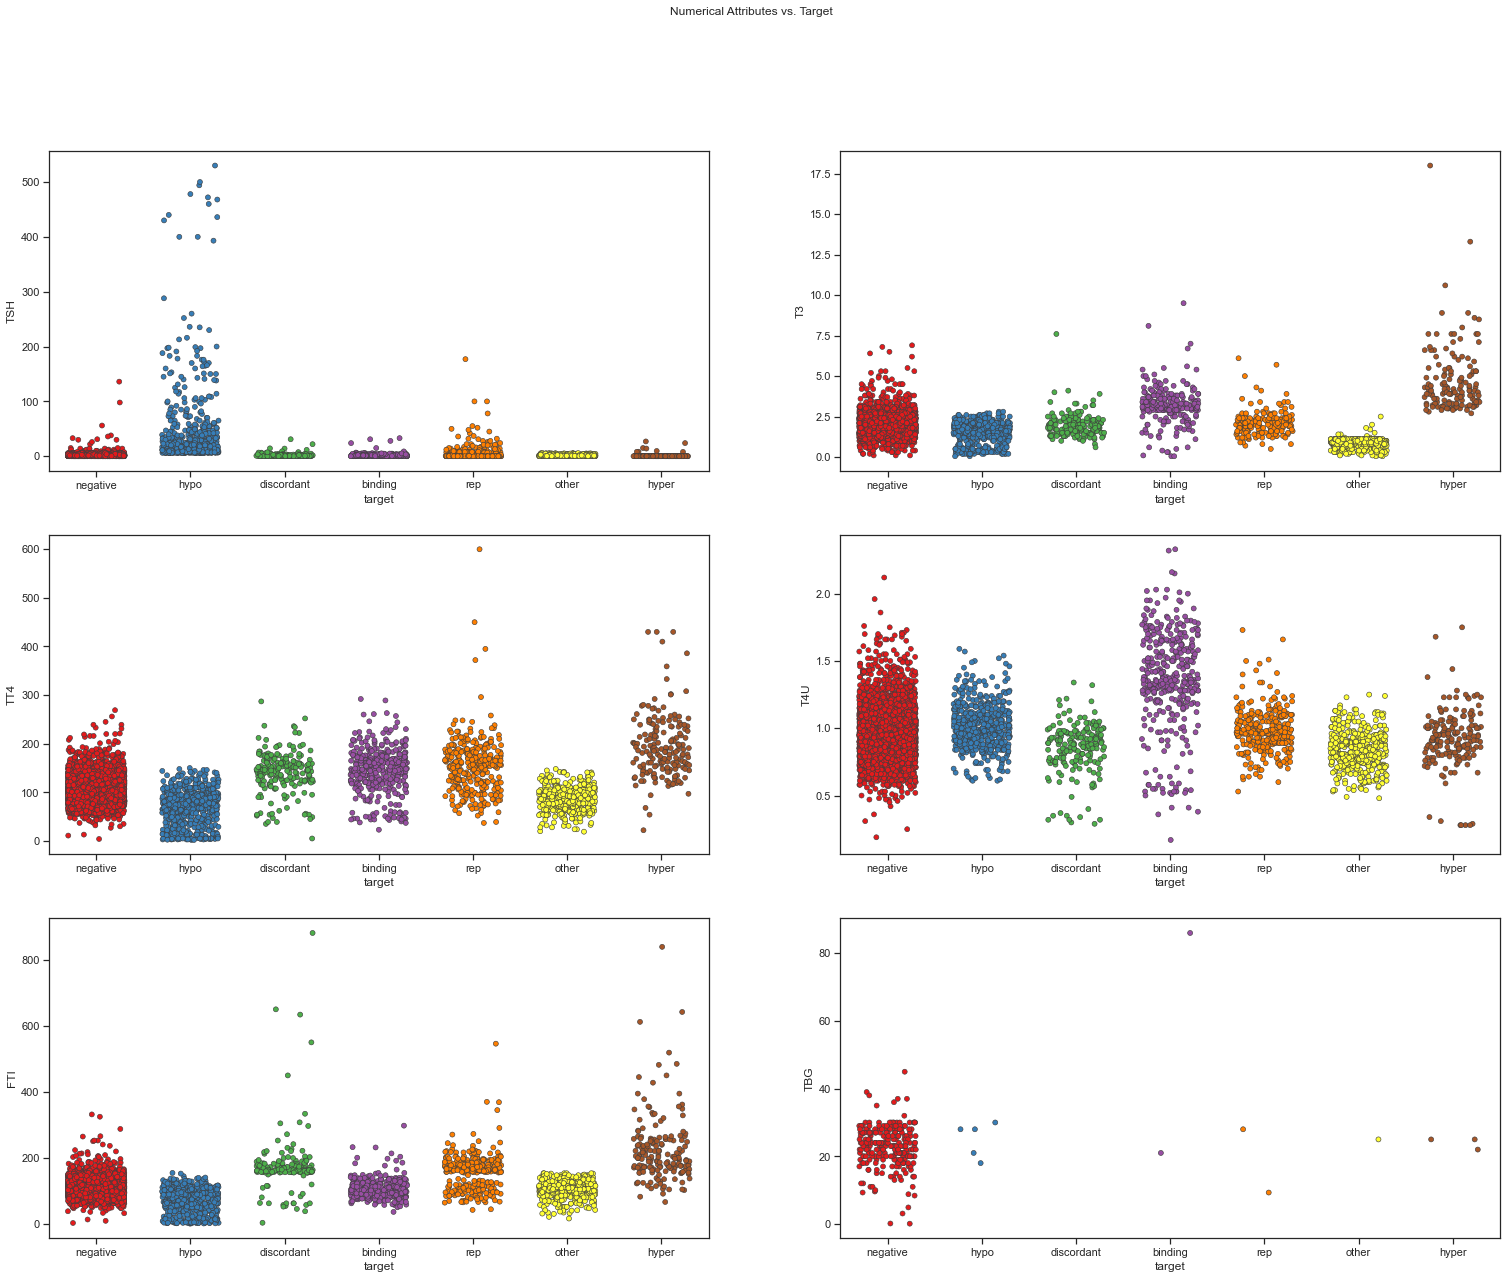

In [170]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(26,20))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_theme(style='ticks')

# TSH vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TSH, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T3, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TT4, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T4U, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.FTI, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TBG, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[2, 1])


---
## Handling Missing Values

After doing a preliminary check...

In [172]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

Overall Missingness of thyroidDF is: 7.02%


In [173]:
# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(thyroidDF)

,Total,Percent
TBG,8626,0.970304
T3,2518,0.283240
TSH,754,0.084814
T4U,718,0.080765
FTI,711,0.079978
TT4,357,0.040157
sex,300,0.033746
age,4,0.000450
referral_source,0,0.000000
psych,0,0.000000


### Missing Table Summary

**thyroidDF[`'TBG'`]** – 97.03% missing
- The 'TBG' attribute is almost entirely missing from the dataset. This column will be removed at once!

**thyroidDF[`'age'`]** – 0.045% missing
- We will also go ahead and drop these 4 observations from the dataset. All 4 of these observations belong to observations with 'target' == 'negative'

**thyroidDF[`'Sex'`]** – 3.37% missing
- There are a total of 300 observations where 'sex' is null. In an attempt to preserve some of these values, we check how many of these observations also have 'pregnant' == True. There are 3 such observations. Assuming the 'pregnancy' attribute is correct for these observations, we can confidently say these 3 observations belong to women and can change their respective values.

In [174]:
# dropping 'TBG' attribute from dataset
thyroidDF.drop(['TBG'], axis=1, inplace=True)

# dropping 4 observations with abnormal 'age' from dataset
thyroidDF.dropna(subset=['age'], inplace=True)

# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
thyroidDF['sex'] = np.where((thyroidDF.sex.isnull()) & (thyroidDF.pregnant == 't'), 'F', thyroidDF.sex)

<AxesSubplot:>

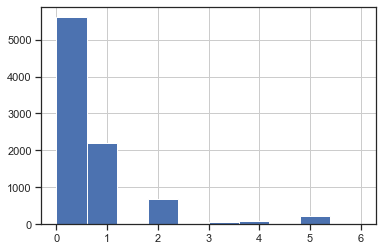

In [178]:
# count missing values per row
thyroidDF['n_missing'] = thyroidDF.isnull().sum(axis=1)
thyroidDF['n_missing'].hist()

#### Exploring Missing Data with missingno...

<AxesSubplot:>

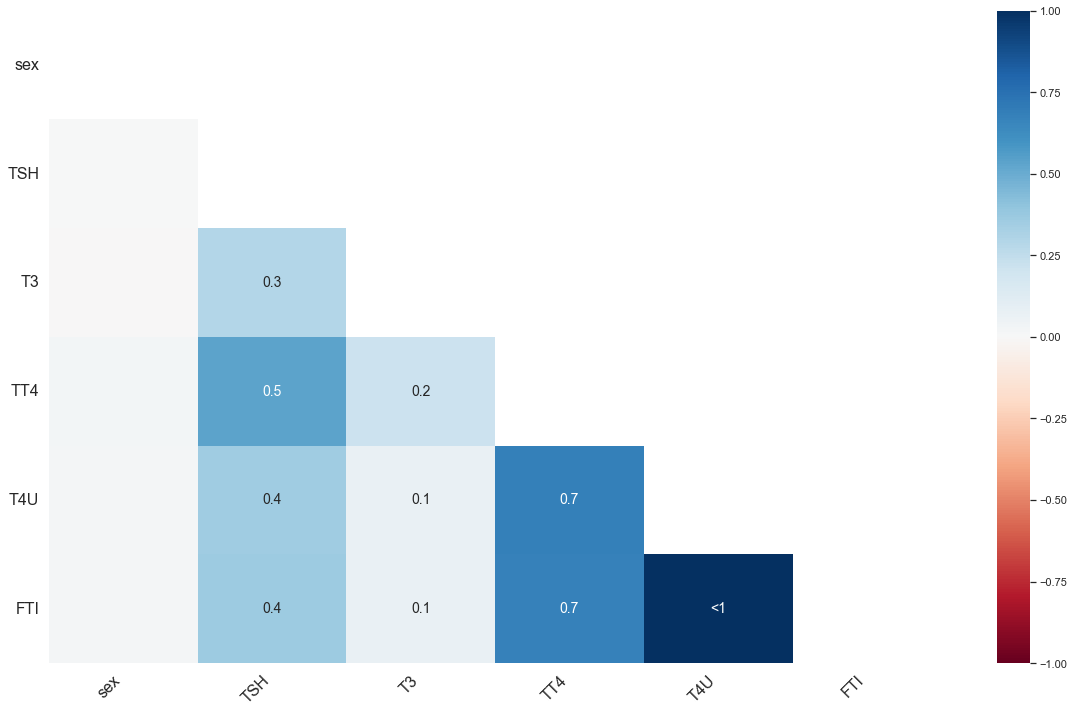

In [107]:
msno.heatmap(thyroidDF)

<AxesSubplot:>

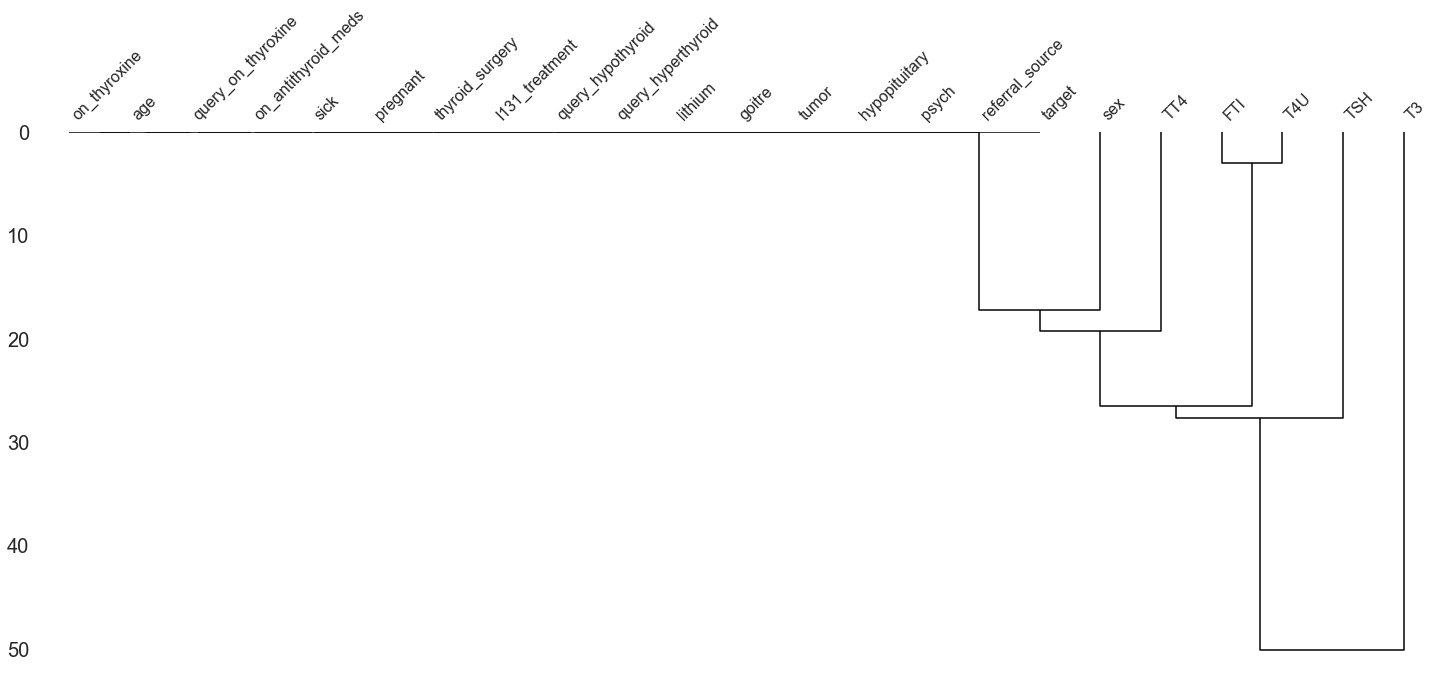

In [97]:
msno.dendrogram(thyroidDF)

In [108]:
# observations with 'sex' == null and 'target' != '-'
thyroidDF[thyroidDF.target != 'negative'].sex.isnull().value_counts()

False    2033
True       86
Name: sex, dtype: int64

In [24]:
thyroidDF.query_hypothyroid.value_counts()

f    8542
t     630
Name: query_hypothyroid, dtype: int64

In [25]:
thyroidDF.query_hyperthyroid.value_counts()

f    8521
t     651
Name: query_hyperthyroid, dtype: int64

In [27]:
thyroidDF.target.value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

---
## ThyroidDF testing